In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt

In [3]:
books = pd.read_csv('/content/book.csv')
books.head()

ChildBks  YouthBks  CookBks  ...  ItalAtlas  ItalArt  Florence
0         0         1        0  ...          0        0         0
1         1         0        0  ...          0        0         0
2         0         0        0  ...          0        0         0
3         1         1        1  ...          0        0         0
4         0         0        1  ...          0        0         0

[5 rows x 11 columns]

# Apriori algorithm

In [4]:
frequent_itemsets = apriori(books, min_support=0.1, use_colnames=True)
frequent_itemsets

support                       itemsets
0    0.4230                     (ChildBks)
1    0.2475                     (YouthBks)
2    0.4310                      (CookBks)
3    0.2820                     (DoItYBks)
4    0.2145                       (RefBks)
5    0.2410                       (ArtBks)
6    0.2760                      (GeogBks)
7    0.1135                     (ItalCook)
8    0.1085                     (Florence)
9    0.1650           (YouthBks, ChildBks)
10   0.2560            (CookBks, ChildBks)
11   0.1840           (DoItYBks, ChildBks)
12   0.1515             (RefBks, ChildBks)
13   0.1625             (ArtBks, ChildBks)
14   0.1950            (ChildBks, GeogBks)
15   0.1620            (YouthBks, CookBks)
16   0.1155           (DoItYBks, YouthBks)
17   0.1010             (ArtBks, YouthBks)
18   0.1205            (YouthBks, GeogBks)
19   0.1875            (DoItYBks, CookBks)
20   0.1525              (RefBks, CookBks)
21   0.1670              (ArtBks, CookBks)
22   0.1925             (CookBks, GeogBks)
23   0.1135            (ItalCook, CookBks)
24   0.1055             (RefBks, DoItYBks)
25   0.1235             (ArtBks, DoItYBks)
26   0.1325            (DoItYBks, GeogBks)
27   0.1105              (RefBks, GeogBks)
28   0.1275              (ArtBks, GeogBks)
29   0.1290  (YouthBks, CookBks, ChildBks)
30   0.1460  (DoItYBks, CookBks, ChildBks)
31   0.1225    (RefBks, CookBks, ChildBks)
32   0.1265    (ArtBks, CookBks, ChildBks)
33   0.1495   (CookBks, ChildBks, GeogBks)
34   0.1045  (DoItYBks, ChildBks, GeogBks)
35   0.1020    (ArtBks, ChildBks, GeogBks)
36   0.1015    (ArtBks, DoItYBks, CookBks)
37   0.1085   (DoItYBks, CookBks, GeogBks)
38   0.1035     (ArtBks, CookBks, GeogBks)

In [5]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

antecedents         consequents  ...  leverage  conviction
0           (YouthBks)          (ChildBks)  ...  0.060308    1.731000
1           (ChildBks)          (YouthBks)  ...  0.060308    1.233750
2            (CookBks)          (ChildBks)  ...  0.073687    1.421069
3           (ChildBks)           (CookBks)  ...  0.073687    1.441240
4           (DoItYBks)          (ChildBks)  ...  0.064714    1.660347
..                 ...                 ...  ...       ...         ...
95   (ArtBks, GeogBks)           (CookBks)  ...  0.048547    3.022812
96  (CookBks, GeogBks)            (ArtBks)  ...  0.057107    1.641657
97            (ArtBks)  (CookBks, GeogBks)  ...  0.057107    1.415327
98           (CookBks)   (ArtBks, GeogBks)  ...  0.048547    1.148237
99           (GeogBks)   (ArtBks, CookBks)  ...  0.057408    1.332800

[100 rows x 9 columns]

In [6]:
rules.sort_values('lift',ascending = False)[0:20] # to check top 20 rules

antecedents          consequents  ...  leverage  conviction
29            (CookBks)           (ItalCook)  ...  0.064582    1.203406
28           (ItalCook)            (CookBks)  ...  0.064582         inf
76   (ArtBks, ChildBks)            (GeogBks)  ...  0.057150    1.944628
81            (GeogBks)   (ArtBks, ChildBks)  ...  0.057150    1.328448
85             (ArtBks)  (DoItYBks, CookBks)  ...  0.056313    1.403674
84  (DoItYBks, CookBks)             (ArtBks)  ...  0.056313    1.654797
99            (GeogBks)    (ArtBks, CookBks)  ...  0.057408    1.332800
94    (ArtBks, CookBks)            (GeogBks)  ...  0.057408    1.904063
96   (CookBks, GeogBks)             (ArtBks)  ...  0.057107    1.641657
97             (ArtBks)   (CookBks, GeogBks)  ...  0.057107    1.415327
54  (CookBks, ChildBks)             (RefBks)  ...  0.067588    1.506277
55             (RefBks)  (CookBks, ChildBks)  ...  0.067588    1.734652
78  (ChildBks, GeogBks)             (ArtBks)  ...  0.055005    1.591452
79             (ArtBks)  (ChildBks, GeogBks)  ...  0.055005    1.395719
86           (DoItYBks)    (ArtBks, CookBks)  ...  0.054406    1.301418
83    (ArtBks, CookBks)           (DoItYBks)  ...  0.054406    1.830626
69            (GeogBks)  (CookBks, ChildBks)  ...  0.078844    1.623273
64  (CookBks, ChildBks)            (GeogBks)  ...  0.078844    1.740319
93            (GeogBks)  (DoItYBks, CookBks)  ...  0.056750    1.338806
88  (DoItYBks, CookBks)            (GeogBks)  ...  0.056750    1.718354

[20 rows x 9 columns]

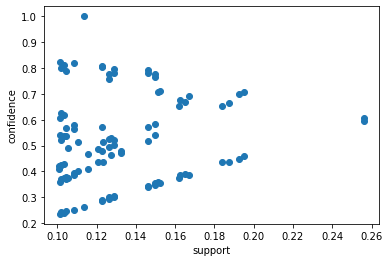

In [7]:
plt.scatter(rules.support,rules.confidence) #plotting support and confidence
plt.ylabel('confidence')
plt.xlabel('support')
plt.show()

Changing apriori algorithm

In [16]:
frequent_itemsets_1 = apriori(books, min_support=0.09, use_colnames=True)
frequent_itemsets_1

support                        itemsets
0    0.4230                      (ChildBks)
1    0.2475                      (YouthBks)
2    0.4310                       (CookBks)
3    0.2820                      (DoItYBks)
4    0.2145                        (RefBks)
5    0.2410                        (ArtBks)
6    0.2760                       (GeogBks)
7    0.1135                      (ItalCook)
8    0.1085                      (Florence)
9    0.1650            (YouthBks, ChildBks)
10   0.2560             (CookBks, ChildBks)
11   0.1840            (DoItYBks, ChildBks)
12   0.1515              (RefBks, ChildBks)
13   0.1625              (ArtBks, ChildBks)
14   0.1950             (ChildBks, GeogBks)
15   0.1620             (YouthBks, CookBks)
16   0.1155            (DoItYBks, YouthBks)
17   0.0965              (RefBks, YouthBks)
18   0.1010              (ArtBks, YouthBks)
19   0.1205             (YouthBks, GeogBks)
20   0.1875             (DoItYBks, CookBks)
21   0.1525               (RefBks, CookBks)
22   0.1670               (ArtBks, CookBks)
23   0.1925              (CookBks, GeogBks)
24   0.1135             (ItalCook, CookBks)
25   0.1055              (RefBks, DoItYBks)
26   0.1235              (ArtBks, DoItYBks)
27   0.1325             (DoItYBks, GeogBks)
28   0.1105               (RefBks, GeogBks)
29   0.1275               (ArtBks, GeogBks)
30   0.1290   (YouthBks, CookBks, ChildBks)
31   0.0950  (DoItYBks, YouthBks, ChildBks)
32   0.0990   (YouthBks, ChildBks, GeogBks)
33   0.1460   (DoItYBks, CookBks, ChildBks)
34   0.1225     (RefBks, CookBks, ChildBks)
35   0.1265     (ArtBks, CookBks, ChildBks)
36   0.1495    (CookBks, ChildBks, GeogBks)
37   0.0900    (RefBks, DoItYBks, ChildBks)
38   0.0950    (ArtBks, DoItYBks, ChildBks)
39   0.1045   (DoItYBks, ChildBks, GeogBks)
40   0.0940     (RefBks, ChildBks, GeogBks)
41   0.1020     (ArtBks, ChildBks, GeogBks)
42   0.0950   (DoItYBks, YouthBks, CookBks)
43   0.0970    (YouthBks, CookBks, GeogBks)
44   0.1015     (ArtBks, DoItYBks, CookBks)
45   0.1085    (DoItYBks, CookBks, GeogBks)
46   0.1035      (ArtBks, CookBks, GeogBks)

In [18]:
rules_1 = association_rules(frequent_itemsets_1, metric="lift", min_threshold= 1) # changing threshold value to 1, to get better lift ratio
rules_1

antecedents         consequents  ...  leverage  conviction
0            (YouthBks)          (ChildBks)  ...  0.060308    1.731000
1            (ChildBks)          (YouthBks)  ...  0.060308    1.233750
2             (CookBks)          (ChildBks)  ...  0.073687    1.421069
3            (ChildBks)           (CookBks)  ...  0.073687    1.441240
4            (DoItYBks)          (ChildBks)  ...  0.064714    1.660347
..                  ...                 ...  ...       ...         ...
139   (ArtBks, GeogBks)           (CookBks)  ...  0.048547    3.022812
140  (CookBks, GeogBks)            (ArtBks)  ...  0.057107    1.641657
141            (ArtBks)  (CookBks, GeogBks)  ...  0.057107    1.415327
142           (CookBks)   (ArtBks, GeogBks)  ...  0.048547    1.148237
143           (GeogBks)   (ArtBks, CookBks)  ...  0.057408    1.332800

[144 rows x 9 columns]

In [19]:
rules_1.sort_values('lift',ascending = False)[0:20] # to check top 20 rules

antecedents           consequents  ...  leverage  conviction
31              (CookBks)            (ItalCook)  ...  0.064582    1.203406
30             (ItalCook)             (CookBks)  ...  0.064582         inf
87               (RefBks)  (DoItYBks, ChildBks)  ...  0.050532    1.405880
86   (DoItYBks, ChildBks)              (RefBks)  ...  0.050532    1.537574
108    (ArtBks, ChildBks)             (GeogBks)  ...  0.057150    1.944628
113             (GeogBks)    (ArtBks, ChildBks)  ...  0.057150    1.328448
107             (GeogBks)    (RefBks, ChildBks)  ...  0.052186    1.286736
102    (RefBks, ChildBks)             (GeogBks)  ...  0.052186    1.907583
105              (RefBks)   (ChildBks, GeogBks)  ...  0.052172    1.432967
104   (ChildBks, GeogBks)              (RefBks)  ...  0.052172    1.516559
129              (ArtBks)   (DoItYBks, CookBks)  ...  0.056313    1.403674
128   (DoItYBks, CookBks)              (ArtBks)  ...  0.056313    1.654797
143             (GeogBks)     (ArtBks, CookBks)  ...  0.057408    1.332800
138     (ArtBks, CookBks)             (GeogBks)  ...  0.057408    1.904063
141              (ArtBks)    (CookBks, GeogBks)  ...  0.057107    1.415327
140    (CookBks, GeogBks)              (ArtBks)  ...  0.057107    1.641657
68    (CookBks, ChildBks)              (RefBks)  ...  0.067588    1.506277
69               (RefBks)   (CookBks, ChildBks)  ...  0.067588    1.734652
54   (YouthBks, ChildBks)             (GeogBks)  ...  0.053460    1.810000
59              (GeogBks)  (YouthBks, ChildBks)  ...  0.053460    1.302034

[20 rows x 9 columns]

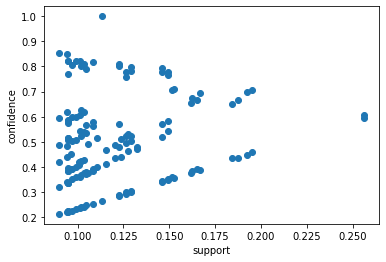

In [20]:
plt.scatter(rules_1.support,rules_1.confidence) #plotting support and confidence
plt.ylabel('confidence')
plt.xlabel('support')
plt.show()